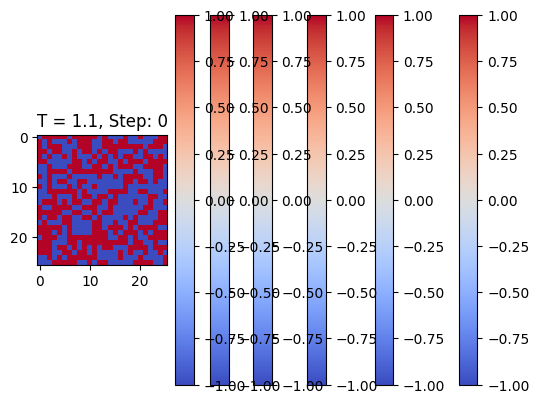

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Simulation Parameters
L = 26  # 3D lattice size
NStp = 1000001  # Increased iterations for convergence
J = 1.0  # Interaction energy
k = 1.0  # Boltzmann constant
H = 0  # No external field
T_values = np.arange(1.0, 6.1, 0.1)  # Temperature range

# Function to compute magnetization
def compute_magnetization(S):
    return np.sum(S) / (L**3)

# Function to run the 3D Ising simulation
def ising_3D_simulation(T, H):
    S = np.random.choice([-1, 1], size=(L, L, L))  # Initialize random spins

    for step in range(NStp):
        # Randomly select a site in the 3D grid
        idx, jdx, kdx = np.random.randint(0, L, size=3)

        # Compute current energy at selected site
        E_current = -J * S[idx, jdx, kdx] * (
            S[(idx + 1) % L, jdx, kdx] + S[(idx - 1) % L, jdx, kdx] +
            S[idx, (jdx + 1) % L, kdx] + S[idx, (jdx - 1) % L, kdx] +
            S[idx, jdx, (kdx + 1) % L] + S[idx, jdx, (kdx - 1) % L]
        ) - H * S[idx, jdx, kdx]

        # Flip spin
        S_trial = -S[idx, jdx, kdx]

        # Compute energy after flipping
        E_trial = -J * S_trial * (
            S[(idx + 1) % L, jdx, kdx] + S[(idx - 1) % L, jdx, kdx] +
            S[idx, (jdx + 1) % L, kdx] + S[idx, (jdx - 1) % L, kdx] +
            S[idx, jdx, (kdx + 1) % L] + S[idx, jdx, (kdx - 1) % L]
        ) - H * S_trial

        dE = E_trial - E_current  # Compute energy difference

        # Metropolis acceptance criterion
        if dE <= 0 or np.random.rand() < np.exp(-dE / (k * T)):
            S[idx, jdx, kdx] = S_trial

        # Visualization update every 250,000 steps
        if step % 250000 == 0:
            clear_output(wait=True)
            plt.imshow(S[:, :, L//2], cmap='coolwarm', origin='upper')  # Show mid-plane slice
            plt.title(f"T = {T}, Step: {step}")
            plt.colorbar()
            display(plt.gcf())

    return compute_magnetization(S)  # Return final magnetization

# Run simulations for each temperature
M_values = []

for T in T_values:
    print(f"Running simulation for T = {T:.1f}...")
    M_final = ising_3D_simulation(T, H)
    M_values.append(M_final)
    print(f"T = {T:.1f}, Magnetization = {M_final:.2f}")

# Plot Magnetization vs Temperature
plt.figure()
plt.plot(T_values, M_values, marker='o')
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization")
plt.title("3D Ising Model: Magnetization vs Temperature")
plt.axvline(4.5, color='red', linestyle='dashed', label="Estimated Curie Temperature")
plt.legend()
plt.grid()
plt.show()
